In [27]:
import pandas as pd
import numpy as np
import math

df = pd.read_csv('train.csv')

train_data = pd.read_csv("train.csv")

df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df.drop(["SibSp","Parch","Fare","Embarked","PassengerId","Name"], axis = 1)

df["Age"].fillna(df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
def agg_età(x):

    if x < 18:
        return "Giovane"
    elif x < 66:
        return "Adulto"
    else:
        return "Senior"


def agg_cabin(x):

    if isinstance(x, str):
        
        return str(x[0])
    
    elif isinstance(x, (int, float)) and math.isnan(x):
        
        return "Senza Cabina"
    



df['Age_Group'] = pd.cut(df['Age'], bins=range(0, 85, 5), right=False)

df["Age Group"]=df["Age"].apply(agg_età)

df["Ponti"] = df["Cabin"].apply(agg_cabin)

df["Morti"] = 1 - df["Survived"]

print("Media morti per Ponti\n",df.groupby("Ponti")["Morti"].mean(),"\n\n")

print("Media morti per Age Group\n",df.groupby("Age Group")["Morti"].mean(),"\n\n")

print("Media morti per Age_Group (.cut method)\n",df.groupby("Age_Group")["Morti"].mean(),"\n\n")

print("Media morti per Sesso\n",df.groupby("Sex")["Morti"].mean(),"\n\n")

df.drop("Age", axis = 1)

pivot_multi_1 = df.pivot_table(values = ["Morti"], index = ["Pclass", "Age Group", "Ponti"], columns = "Sex", aggfunc = "sum", fill_value=0)

pivot_multi_1["Totale"] = pivot_multi_1[("Morti","male")]+pivot_multi_1[("Morti","female")]

pivot_multi_2 = df.pivot_table(values = ["Morti"], index = ["Pclass", "Age_Group", "Ponti"], columns = "Sex", aggfunc = "sum", fill_value=0)

pivot_multi_2["Totale"] = pivot_multi_2[("Morti","male")]+pivot_multi_2[("Morti","female")]





Media morti per Ponti
 Ponti
A               0.533333
B               0.255319
C               0.406780
D               0.242424
E               0.250000
F               0.384615
G               0.500000
Senza Cabina    0.700146
T               1.000000
Name: Morti, dtype: float64 


Media morti per Age Group
 Age Group
Adulto     0.615514
Giovane    0.460177
Senior     0.713514
Name: Morti, dtype: float64 


Media morti per Age_Group (.cut method)
 Age_Group
[0, 5)      0.325000
[5, 10)     0.500000
[10, 15)    0.562500
[15, 20)    0.604651
[20, 25)    0.657895
[25, 30)    0.641509
[30, 35)    0.578947
[35, 40)    0.541667
[40, 45)    0.625000
[45, 50)    0.609756
[50, 55)    0.562500
[55, 60)    0.625000
[60, 65)    0.600000
[65, 70)    1.000000
[70, 75)    1.000000
[75, 80)         NaN
Name: Morti, dtype: float64 


Media morti per Sesso
 Sex
female    0.257962
male      0.811092
Name: Morti, dtype: float64 


Pivot Table numero 1
                                Morti      Totale
Se

C:\Users\stefano\AppData\Local\Temp\ipykernel_7356\3439769433.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Media morti per Age_Group (.cut method)\n",df.groupby("Age_Group")["Morti"].mean(),"\n\n")
C:\Users\stefano\AppData\Local\Temp\ipykernel_7356\3439769433.py:46: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_multi_2 = df.pivot_table(values = ["Morti"], index = ["Pclass", "Age_Group", "Ponti"], columns = "Sex", aggfunc = "sum", fill_value=0)


In [48]:
print("Pivot Table numero 1\n", pivot_multi_1,"\n\n")


Pivot Table numero 1
                                Morti      Totale
Sex                           female male       
Pclass Age Group Ponti                          
1      Adulto    A                 0    4      4
                 B                 0   10     10
                 C                 2   18     20
                 D                 0    7      7
                 E                 0    7      7
                 Senza Cabina      0   11     11
                 T                 0    1      1
       Giovane   A                 0    0      0
                 B                 0    0      0
                 C                 1    0      1
                 D                 0    0      0
       Senior    A                 0    4      4
                 B                 0    2      2
                 C                 0    3      3
                 D                 0    0      0
                 E                 0    0      0
                 Senza Cabina      0   10     1

In [49]:

print("Pivot Table numero 2\n", pivot_multi_2,"\n\n")

Pivot Table numero 2
                                Morti      Totale
Sex                           female male       
Pclass Age_Group Ponti                          
1      [0, 5)    A                 0    0      0
                 B                 0    0      0
                 C                 1    0      1
                 D                 0    0      0
                 E                 0    0      0
...                              ...  ...    ...
3      [75, 80)  E                 0    0      0
                 F                 0    0      0
                 G                 0    0      0
                 Senza Cabina      0    0      0
                 T                 0    0      0

[432 rows x 3 columns] 




In [50]:
from IPython.display import display

display(pivot_multi_2)

Morti      Totale
Sex                           female male       
Pclass Age_Group Ponti                          
1      [0, 5)    A                 0    0      0
                 B                 0    0      0
                 C                 1    0      1
                 D                 0    0      0
                 E                 0    0      0
...                              ...  ...    ...
3      [75, 80)  E                 0    0      0
                 F                 0    0      0
                 G                 0    0      0
                 Senza Cabina      0    0      0
                 T                 0    0      0

[432 rows x 3 columns]

In [ ]:
#Michael

pclass_survival = train_data.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Pclass:\n", pclass_survival)

sex_survival = train_data.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Sex:\n", sex_survival)

embarked_survival = train_data.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarked:\n", embarked_survival)

sibsp_survival = train_data.groupby('SibSp')['Survived'].mean()
print("\nSurvival Rate by SibSp:\n", sibsp_survival)

parch_survival = train_data.groupby('Parch')['Survived'].mean()
print("\nSurvival Rate by Parch:\n", parch_survival)

Survival Rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Embarked:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Survival Rate by SibSp:
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival Rate by Parch:
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


In [ ]:
#Michael

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=range(0, 85, 5), right=False)

age_survival = train_data.groupby('AgeGroup').agg(
SurvivalRate=('Survived', 'mean'),
Count=('Survived', 'size')
)

print("\nSurvival Rate by Age Group:\n", age_survival)


Survival Rate by Age Group:
           SurvivalRate  Count
AgeGroup                     
[0, 5)        0.675000     40
[5, 10)       0.500000     22
[10, 15)      0.437500     16
[15, 20)      0.395349     86
[20, 25)      0.342105    114
[25, 30)      0.358491    106
[30, 35)      0.421053     95
[35, 40)      0.458333     72
[40, 45)      0.375000     48
[45, 50)      0.390244     41
[50, 55)      0.437500     32
[55, 60)      0.375000     16
[60, 65)      0.400000     15
[65, 70)      0.000000      4
[70, 75)      0.000000      6
[75, 80)           NaN      0


C:\Users\stefano\AppData\Local\Temp\ipykernel_7356\312253132.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train_data.groupby('AgeGroup').agg(


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

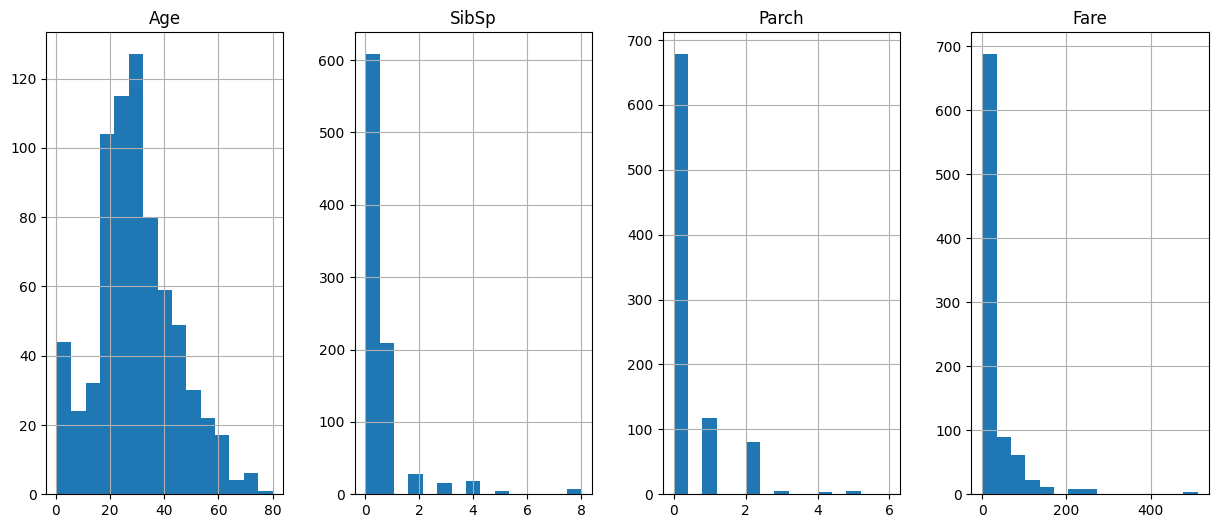

In [51]:
import matplotlib

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

train_data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 4))